#### Parte 0 - Funcoes auxiliares para o projeto

In [3]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [101]:
def linearSolve(a, b):
    '''
        Resolve um sistema linear utilizando o metodo de
        diagonalizacao da matriz (fatoracao de Gauss) seguido da
        resolucao do sistema triangular superior.
        
        IMPORTANTE (1): Idealmente, trabalhe com floats (coloca um '.' dps do numero inteiro.)
        IMPORTANTE(2): a e b sao arrays, nao listas.
    '''
    
    # Diagonaliza a matriz a
    for i in range(a.shape[0]-1):
        max = i+ np.argmax(np.absolute(a[i:, i]))
        
        a[[i,max]] = a[[max,i]] # Troca linhas da array (magic!)
        b[[i,max]] = b[[max,i]]

        for j in range(i+1, a.shape[0]):
            m = a[j,i]/(a[i,i])
            a[j] = a[j] - (m*a[i]) # Usar -= da um warning (nao sei o porque)
            b[j] = b[j] - (m*b[i])
      
    x = np.empty(b.shape)
    for i in np.arange(a.shape[0]-1, -1, -1):
        x[i] = b[i]
        for j in np.arange(a.shape[0]-1, i, -1):
            x[i] -= (a[i, j] * x[j])
        x[i] /= (float)(a[i,i])
    return x

In [98]:
# Teste da funcao linearsolve().
# Faca mais testes pra ver se encontra bugs 
a = np.array([[.3e33,1., .5e4], [1.,2., .5e4],[3.5, 4., .5e-4]])
b = np.array([9. ,8., .1])

x = linearSolve(a, b)
print x
print "testando solucao..."
if np.allclose(np.dot(a, x), b):
    print "Sistema resolvido corretamente."
else:
    print "Resposta esperada:", np.linalg.solve(a, b)

A = [[  3.00000000e+32   1.00000000e+00   5.00000000e+03]
 [  0.00000000e+00   2.00000000e+00   5.00000000e+03]
 [  0.00000000e+00   4.00000000e+00   5.00000000e-05]]
b = [ 9.   8.   0.1]
A = [[  3.00000000e+32   1.00000000e+00   5.00000000e+03]
 [  0.00000000e+00   4.00000000e+00   5.00000000e-05]
 [  0.00000000e+00   0.00000000e+00   4.99999997e+03]]
b = [ 9.    0.1   7.95]
[  3.41666660e-33   2.49999801e-02   1.59000001e-03]
testando solucao...
Sistema resolvido corretamente.


In [6]:
#testando a solucao
np.allclose(np.dot(a, x), b)

True

# Parte 1 - Cantareira

Nessa parte, analizaremos dados do nível de água da usina Cantareira entre os anos de 2003 e agosto de 2015. 

O proposto é utilizar métodos numéricos para ajustar os dados a uma função apropriada.

In [7]:
# Cria estrutura para armazenar datas e niveis da usina cantareira
cantareira = {"datas": [], "dia": [], "niveis": []}
datas = cantareira["datas"]
dia = cantareira["dia"]
niveis = cantareira["niveis"]

In [8]:
#Formata os dados lidos do arquivo como duas listas
with open('cantareira.txt', 'r') as file:
    i = 1
    for line in file:
        atual = line.split()
        datas.append(int(atual[0]))
        dia.append(i)
        niveis.append(float(atual[1]))
        i+=1

In [9]:
datasArray = np.array(datas)
diaArray = np.array(dia)
niveisArray = np.array(niveis)

In [10]:
print "datas\t\t","dia\t", "niveis"
for i in range(len(datas)):
    print datas[i],"\t",dia[i], "\t", niveis[i]

datas		dia	niveis
20030101 	1 	42.5
20030102 	2 	42.3
20030103 	3 	42.3
20030104 	4 	42.3
20030105 	5 	42.4
20030106 	6 	42.4
20030107 	7 	42.5
20030108 	8 	42.5
20030109 	9 	42.6
20030110 	10 	42.3
20030111 	11 	42.4
20030112 	12 	42.6
20030113 	13 	43.0
20030114 	14 	42.9
20030115 	15 	42.8
20030116 	16 	42.8
20030117 	17 	43.3
20030118 	18 	44.6
20030119 	19 	45.3
20030120 	20 	46.1
20030121 	21 	46.7
20030122 	22 	48.1
20030123 	23 	49.2
20030124 	24 	50.1
20030125 	25 	51.1
20030126 	26 	52.1
20030127 	27 	53.3
20030128 	28 	54.4
20030129 	29 	56.0
20030130 	30 	57.5
20030131 	31 	59.1
20030201 	32 	60.4
20030202 	33 	61.1
20030203 	34 	61.5
20030204 	35 	61.9
20030205 	36 	62.1
20030206 	37 	62.6
20030207 	38 	62.9
20030208 	39 	63.0
20030209 	40 	63.2
20030210 	41 	63.3
20030211 	42 	63.4
20030212 	43 	63.4
20030213 	44 	63.2
20030214 	45 	63.6
20030215 	46 	63.6
20030216 	47 	63.8
20030217 	48 	63.8
20030218 	49 	64.7
20030219 	50 	65.0
20030220 	51 	65.2
20030221 	52 	65.5
200

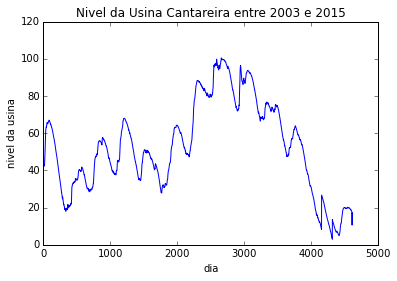

In [11]:
plt.plot(dia, niveis, 'b-')
plt.title("Nivel da Usina Cantareira entre 2003 e 2015")
plt.ylabel('nivel da usina')
plt.xlabel("dia")
plt.show()

### Aproximacao da tabela por uma função linear por minimos quadrados

Aproximaremos a tabela acima por uma função no modelo
$$f(x) = a \cdot g_1(x) + b \cdot g_2(x),$$
com $g_1(x) = x$ e $g_2(x) = 1$.
Para descobrir os coeficientes, temos que
$$L(a, b) = \sum\limits_{k=1}^m (f(x_k) - y_k)^2$$
tem que ser mínima. para isso, $\frac{\partial L(a)}{\partial a} = 0$ e $\frac{\partial L(b)}{\partial b} = 0$. Assim, teremos que resolver um sistema de equações no formato:

$$\sum\limits_{k=1}^m x_k^2 \cdot a + \sum\limits_{k=1}^m x_k \cdot b = \sum\limits_{k=1}^m (x_k \cdot y_k) $$
$$\sum\limits_{k=1}^m x_k \cdot a + \sum\limits_{k=1}^m 1 \cdot b = \sum\limits_{k=1}^m (1 \cdot y_k) $$

In [12]:
def linearMMQ(x, y):
    '''
        Aproxima pontos dados numa funcao linear pelo metodo dos minimos quadrados.
    '''
    # Ajustando os coeficientes das matrizes A e B
    somaX = np.sum(x)
    somaQuadradoX = np.sum(np.square(x))
    somaY = np.sum(y)
    somaXY = np.sum(np.multiply(x, y))
    num = len(y)

    a = np.array([[somaQuadradoX, somaX],
                  [somaX, num]])
    b = np.array([somaXY, somaY])
    print "Resolvendo o sistema linear Ac = B:"
    print "A =", a
    print "B =", b
    
    c = linearSolve(a, b)
    
    #testando a solucao
    print "\n testando..."
    print "Sistema resolvido corretamente:", np.allclose(np.dot(a, c), b)
    return c

In [13]:
c1 = linearMMQ(diaArray, niveisArray)

Resolvendo o sistema linear Ac = B:
A = [[32817043485    10660653]
 [   10660653        4617]]
B = [  5.60840466e+08   2.44031300e+05]

 testando...
Sistema resolvido corretamente: True


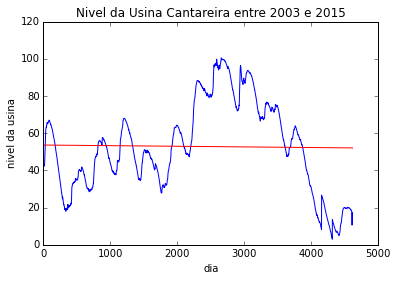

In [14]:
funG = lambda x: c1[0]*x + c1[1] #funcao linear encontrada

linearY = np.vectorize(funG)(dia)

plt.plot(dia, niveis, 'b-')
plt.plot(dia, linearY, 'r-')
plt.title("Nivel da Usina Cantareira entre 2003 e 2015")
plt.ylabel('nivel da usina')
plt.xlabel("dia")
plt.show()

### Aproximacao da tabela por uma função de 4o grau por minimos quadrados

Para fazer a aproximação, seguimos o mesmo processo da etapa linear, mas considerando o modelo
$$f(x) = a \cdot g_1(x) + b \cdot g_2(x) + c \cdot g_3(x) + d \cdot g_4(x) + e \cdot g_5(x),$$
com $g_1(x) = x^4$, $g_2(x) = x^3$, $g_3(x) = x^2$, $g_4(x) = x$ e $g_5(x) = 1$.
Dessa forma, chegamos no sistema:
$$\sum\limits_{k=1}^m x_k^8 \cdot a + \sum\limits_{k=1}^m x_k^7 \cdot b + \sum\limits_{k=1}^m x_k^6 \cdot c + \sum\limits_{k=1}^m x_k^5 \cdot d + \sum\limits_{k=1}^m x_k^4 \cdot e= \sum\limits_{k=1}^m (x_k^4 \cdot y_k) $$
$$\sum\limits_{k=1}^m x_k^7 \cdot a + \sum\limits_{k=1}^m x_k^6 \cdot b + \sum\limits_{k=1}^m x_k^5 \cdot c + \sum\limits_{k=1}^m x_k^4 \cdot d + \sum\limits_{k=1}^m x_k^3 \cdot e= \sum\limits_{k=1}^m (x_k^3 \cdot y_k) $$
$$\sum\limits_{k=1}^m x_k^6 \cdot a + \sum\limits_{k=1}^m x_k^5 \cdot b + \sum\limits_{k=1}^m x_k^4 \cdot c + \sum\limits_{k=1}^m x_k^3 \cdot d + \sum\limits_{k=1}^m x_k^2 \cdot e= \sum\limits_{k=1}^m (x_k^2 \cdot y_k) $$
$$\sum\limits_{k=1}^m x_k^5 \cdot a + \sum\limits_{k=1}^m x_k^4 \cdot b + \sum\limits_{k=1}^m x_k^3 \cdot c + \sum\limits_{k=1}^m x_k^2 \cdot d + \sum\limits_{k=1}^m x_k \cdot e= \sum\limits_{k=1}^m (x_k \cdot y_k) $$
$$\sum\limits_{k=1}^m x_k^4 \cdot a + \sum\limits_{k=1}^m x_k^3 \cdot b + \sum\limits_{k=1}^m x_k^2 \cdot c + \sum\limits_{k=1}^m x_k \cdot d + \sum\limits_{k=1}^m 1 \cdot e= \sum\limits_{k=1}^m (1 \cdot y_k) $$

In [102]:
def quartoGrauMMQ(x, y):
    '''
        Aproxima pontos dados numa funcao polinomial de 4o grau pelo metodo dos minimos quadrados.
    '''
    somaPotX = []
    for i in range(9):
        sum = 0 #Pode ser reduzida para somaPotX.append(np.sum(x**i)) se nao houver overflow
        for xk in x:
            sum += pow(xk, i)
        somaPotX.append(sum)
        
    somaPotXY = []
    for i in range(5): 
        sum = 0 #Pode ser reduzida para somaPotXY.append(np.sum(np.multiply(x**i, y))) se nao houver overflow
        for xk in x:
            sum += pow(xk, i)
        somaPotXY.append(sum)
    
    # Ajustando os coeficientes das matrizes A e B
    a = np.array(
        [[somaPotX[8], somaPotX[7], somaPotX[6], somaPotX[5], somaPotX[4]],
         [somaPotX[7], somaPotX[6], somaPotX[5], somaPotX[4], somaPotX[3]],
         [somaPotX[6], somaPotX[5], somaPotX[4], somaPotX[3], somaPotX[2]],
         [somaPotX[5], somaPotX[4], somaPotX[3], somaPotX[2], somaPotX[1]],
         [somaPotX[4], somaPotX[3], somaPotX[2], somaPotX[1], somaPotX[0]]])
         
    b = np.array(somaPotXY[::-1]) #B eh a array somaPotXY de baixo pra cima
    
    print "Resolvendo o sistema linear Ac = B:"
    print "A =", a
    print "B =", b
    
    c = linearSolve(a, b)
    
    #testando a solucao
    print "testando solucao..."
    if np.allclose(np.dot(a, c), b):
        print "Sistema resolvido corretamente."
    else:
        print "Resposta esperada:", np.linalg.solve(a, b)
    return c

In [103]:
diaArrayBig = np.array (diaArray, dtype="float64")
c4 = quartoGrauMMQ(diaArrayBig, niveisArray)
print c4

SOMAPOTX: [4617.0, 10660653.0, 32817043485.0, 113649522386409.0, 4.1982132913198714e+17, 1.615437457819812e+21, 6.3936705313349413e+24, 2.5832426261880306e+28, 1.0602775514185883e+32]
Resolvendo o sistema linear Ac = B:
A = [[  1.06027755e+32   2.58324263e+28   6.39367053e+24   1.61543746e+21
    4.19821329e+17]
 [  2.58324263e+28   6.39367053e+24   1.61543746e+21   4.19821329e+17
    1.13649522e+14]
 [  6.39367053e+24   1.61543746e+21   4.19821329e+17   1.13649522e+14
    3.28170435e+10]
 [  1.61543746e+21   4.19821329e+17   1.13649522e+14   3.28170435e+10
    1.06606530e+07]
 [  4.19821329e+17   1.13649522e+14   3.28170435e+10   1.06606530e+07
    4.61700000e+03]]
B = [  1.67029416e+19   5.02689483e+15   1.60327035e+12   5.60840466e+08
   2.44031300e+05]
testando solucao...
Sistema resolvido corretamente.
[  1.81945642e-12  -2.33375355e-08   8.49240250e-05  -8.79321350e-02
   6.12828699e+01]


In [253]:
funG = lambda x: c4[0]*x**4 + c4[1]*x**3 + c4[2]*x**2 + c4[3]*x**1 + c4[4] #funcao linear encontrada

linearY = np.vectorize(funG)(dia)

plt.plot(dia, niveis, 'b-')
plt.plot(dia, linearY, 'r-')
plt.title("Nivel da Usina Cantareira entre 2003 e 2015")
plt.ylabel('nivel da usina')
plt.xlabel("dia")
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

# Parte 2 - Equação de Calor